# Feature Engineering

1. Missing data
2. Feature Normalization
3. Categorical Encoding
4. Transformations
5. Discretization
6. Outliers
7. Optional: Date and Time

---
## 1. Missing data

In [1]:
import pylab 
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv')

In [3]:
data0 = titanic.copy()

In [4]:
data0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(f'Percentage of data without missing values: {data0.dropna().shape[0]/ np.float(data0.shape[0])}')

Percentage of data without missing values: 0.2053872053872054


In [6]:
data1 = titanic.copy()

In [7]:
data1.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**TODO:** `Age` is a continuous variable. First, we will check the distribution of `age` variable.

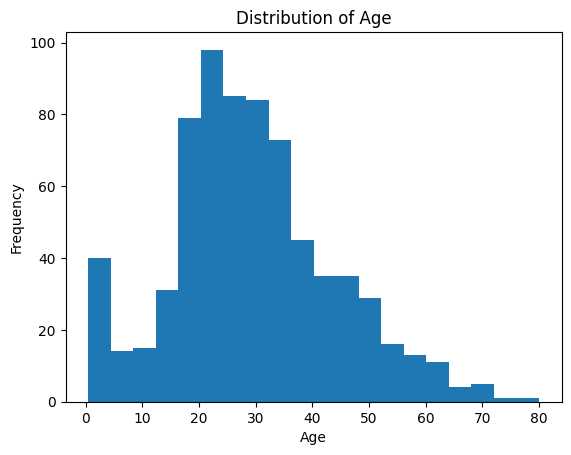

In [19]:
# create a histogram
plt.hist(data1['Age'], bins=20)

# add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# show the plot
plt.show()

We create a histogram with 20 bins that show the distribution of the Age variable. The x-axis represents the age range, and the y-axis represents the frequency (number of passengers) in each age bin. The resulting plot can help us to understand the central tendency, spread, and shape of the Age variable distribution.

**TODO:** We can see that the `age` distribution is skewed. So, we will use the median imputation.

In [23]:
# Calculating the median of 'Age':
median_age = data1['Age'].median()

# Filling the missing values with the median age:
data1['Age'].fillna(median_age, inplace=True)

# Showing the results:
print('We show the replaced column: ', data1['Age'])

We show the replaced column:  0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


---
## 2. Feature Normalization

In [9]:
data2 = titanic.copy()
median = data2.Age.median()
data2['Age'] = data2['Age'].fillna(median)
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**TODO:** We are going to normalize the Age in two ways using MinMax Scaler and Standard Scaler

---
## 3. Categorical Encoding

### One-Hot Encoding

In [10]:
data3 = titanic.copy()

In [11]:
data3['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
data3_oh = pd.get_dummies(data3['Sex'])
data3_oh.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [13]:
data3 = data3.join(data3_oh)
data3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


We can see that we only need 1 of the 2 dummy variables to represent the original categorical variable `Sex`. Any of the 2 will do the job, and it doesn't matter which one we select, since they are equivalent. Therefore, to encode a categorical variable with 2 labels, we need only 1 dummy variable.

To extend this concept, to encode categorical variable with k labels, we need k-1 dummy variables. We can achieve this task as follows:

**TODO:** Obtaining k-1 labels on __Sex__ and __Embarked__ features

**TODO:** Investigate Scikt-Learn API [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). 

---
## 4 Transformations

In [14]:
data4 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])
data4.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
data4['Age'] = data4['Age'].fillna(data4.Age.median())
data4.isna().sum()

Survived    0
Age         0
Fare        0
dtype: int64

### Example: Logarithmic transformation

In [16]:
data4['Age_log'] = np.log(data4.Age)

**TODO:** Convert Age to months

---
## 5. Discretization

**TODO:** Apply binning to __Age__ and plot Age count per bin

---
## 6. Outliers

**TODO:** Load the numerical variables of the Titanic Dataset

**TODO:** We can see that `Age` and `Fare` are continuous variables. So, you'll need to limit outliers on those variables.

**TODO:** Plot histograms on __Age__ and __Fare__

**TODO:** __Age__ is quite Gaussian and __Fare__ is skewed, so you will use the Gaussian assumption for __Age__, and the interquantile range for __Fare__.

### Find outliers

---
## 7. Optional: Date and Time

In some machine learning problems, temporary features appear, such as dates, times, etc. That type of data must be treated in a particular way.

**NOTE:** There is an area of machine learning where time data becomes critical, time series.

In [17]:
data7 = pd.read_csv('https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/stock_prices.csv')
data7.head()

,Date,Close Price,High Price,Low Price,Open Price,Volume
0,2021-12-10 05AM,48246.57,48359.35,48051.08,48170.66,827.39761
1,2021-12-10 06AM,47847.59,48430.00,47810.81,48249.78,1296.18883
2,2021-12-10 07AM,47694.62,48037.48,47550.00,47847.59,2299.85298
3,2021-12-10 08AM,48090.35,48169.06,47587.39,47694.62,1371.25447
4,2021-12-10 09AM,48366.37,48495.00,47869.80,48090.35,1232.30238


**TODO:** Parse the dates, currently coded as strings, into datetime.

**TIP:** Investigate pandas [to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and take care of date format!

**TODO:** Extract Month from Date

**TODO:** Convert Day to numeric from 1-31

**TODO:** Convert Day of the week to numeric from 0 to 6

**TODO:** Convert Day of the week to name

**TODO:** Was on Weekend? Generate a binary feature that indicates if the date corresponds to a weekend day.

**TODO:** Extract year 

**TODO:** Extract hour